# **Diabetes Prediction**

The current dataset contains data of different people. Some of them were diagnosed

Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

Reading csv

In [3]:
df = pd.read_csv('lib/data/Diabetes_dataset_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

Working with columns

Renaming columns

Deleting rows where Diabetic (1) and BMI (4) are missing. Diabetic is too vital to be left missing and BMI is very important attribute because of that it cannot be replaced properly

Deleting column highBP, because it is redundant, due to presense of BPlevel attribute. Some of values in highBP contradict BPlevel.

In [4]:
column_dict = {'Family_Diabetes':'FamilyDiabetes', 'Pregancies':'Pregnancies', 'UriationFreq':'UrinationFreq', 'Pdiabetes':'GestationalDiabetes'}
df.rename(columns=column_dict, inplace=True)
df.dropna(subset=['Diabetic', 'BMI'], inplace=True)
df.drop('highBP', inplace=True, axis=1)
df

,Age,Gender,FamilyDiabetes,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,GestationalDiabetes,UrinationFreq,Diabetic
0,50-59,Male,no,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


Working with GestationalDiabetes values.

One value is missing in row of Male, that is why GestationalDiabetes value is put to no, because male cannot have it biologically.

Also some values are signifie as 0, which has to be changed to no.

In [5]:
print('GestationalDiabetes - unique values before: ' + str(df['GestationalDiabetes'].unique()))
df.loc[(df['Gender'] == 'Male') | (df['GestationalDiabetes'] == '0'), 'GestationalDiabetes'] = 'no'
print('GestationalDiabetes - unique values after: ' + str(df['GestationalDiabetes'].unique()))

GestationalDiabetes - unique values before: ['0' 'yes' nan 'no']
GestationalDiabetes - unique values after: ['no' 'yes']


In [6]:
print('Pregnancies - unique values: ' + str(df['Pregnancies'].unique()))
df.loc[df['Gender'] == 'Male', 'Pregnancies'] = 0.0
print('Pregnancies - unique values: ' + str(df['Pregnancies'].unique()))

Pregnancies - unique values: [ 0.  1.  2.  3.  4. nan]
Pregnancies - unique values: [ 0.  1.  2.  3.  4. nan]


In [7]:
print('RegularMedicine - unique values before: ' + str(df['RegularMedicine'].unique()))
df.loc[df['RegularMedicine'] == 'o', 'RegularMedicine'] = 'no'
print('RegularMedicine - unique values after : ' + str(df['RegularMedicine'].unique()))

RegularMedicine - unique values before: ['no' 'yes' 'o']
RegularMedicine - unique values after : ['no' 'yes']


In [8]:
print('BPLevel - unique values before: ' + str(df['BPLevel'].unique()))
df.loc[df['BPLevel'] == 'High', 'BPLevel'] = 'high'
df.loc[df['BPLevel'] == 'Low',  'BPLevel'] = 'low'
df.loc[df['BPLevel'] == 'normal ', 'BPLevel'] = 'normal'
print('BPLevel - unique values after : ' + str(df['BPLevel'].unique()))

BPLevel - unique values before: ['high' 'normal' 'low' 'Low' 'High' 'normal ']
BPLevel - unique values after : ['high' 'normal' 'low']


In [9]:
print('Diabetic - unique values before: ' + str(df['Diabetic'].unique()))
df.loc[df['Diabetic'] == ' no', 'Diabetic'] = 'no'
print('Diabetic - unique values after : ' + str(df['Diabetic'].unique()))

Diabetic - unique values before: ['no' 'yes' ' no']
Diabetic - unique values after : ['no' 'yes']


In [10]:
def add_value(df, lst, column, new_column):
    unique_list = df[column].unique()
    print(column + ' : ' + str(unique_list))
    print(' ' * len(column) + '   ' + str(lst))
    d = dict(zip(unique_list, lst))
    df[new_column] = [d[x] for x in df[column]]
    return df, d


df, ag_d = add_value(df, [2, 1, 0, 3], 'Age', 'Ag_v')
df, ge_d = add_value(df, [0, 1], 'Gender', 'Ge_v')
df, fd_d = add_value(df, [0, 1], 'FamilyDiabetes', 'FD_v')
df, pa_d = add_value(df, [1.00, 0.33, 0.00, 0.66], 'PhysicallyActive', 'PA_v')
df, sm_d = add_value(df, [0, 1], 'Smoking', 'Sm_v')
df, al_d = add_value(df, [0, 1], 'Alcohol', 'Al_v')
df, rm_d = add_value(df, [0, 1], 'RegularMedicine', 'RM_v')
df, jf_d = add_value(df, [0.10, 0.65, 0.35, 0.90], 'JunkFood', 'JF_v')
df, st_d = add_value(df, [0.33, 0.00, 0.66, 1.00], 'Stress', 'St_v')
df, bp_d = add_value(df, [1.0, 0.5, 0.0], 'BPLevel', 'BP_v')
df, gd_d = add_value(df, [0, 1], 'GestationalDiabetes', 'GD_v')
df, uf_d = add_value(df, [0, 1], 'UrinationFreq', 'UF_v')
df, di_d = add_value(df, [0, 1], 'Diabetic', 'Di_v')

Age : ['50-59' '40-49' 'less than 40' '60 or older']
      [2, 1, 0, 3]
Gender : ['Male' 'Female']
         [0, 1]
FamilyDiabetes : ['no' 'yes']
                 [0, 1]
PhysicallyActive : ['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
                   [1.0, 0.33, 0.0, 0.66]
Smoking : ['no' 'yes']
          [0, 1]
Alcohol : ['no' 'yes']
          [0, 1]
RegularMedicine : ['no' 'yes']
                  [0, 1]
JunkFood : ['occasionally' 'very often' 'often' 'always']
           [0.1, 0.35, 0.65, 0.9]
Stress : ['sometimes' 'not at all' 'very often' 'always']
         [0.33, 0.0, 0.66, 1.0]
BPLevel : ['high' 'normal' 'low']
          [1.0, 0.5, 0.0]
GestationalDiabetes : ['no' 'yes']
                      [0, 1]
UrinationFreq : ['not much' 'quite often']
                [0, 1]
Diabetic : ['no' 'yes']
           [0, 1]


In [11]:
df.head()

,Age,Gender,FamilyDiabetes,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,...,PA_v,Sm_v,Al_v,RM_v,JF_v,St_v,BP_v,GD_v,UF_v,Di_v
0,50-59,Male,no,one hr or more,39.0,no,no,8,6,no,...,1.00,0,0,0,0.10,0.33,1.0,0,0,0
1,50-59,Male,no,less than half an hr,28.0,no,no,8,6,yes,...,0.33,0,0,1,0.35,0.33,0.5,0,0,0
2,40-49,Male,no,one hr or more,24.0,no,no,6,6,no,...,1.00,0,0,0,0.10,0.33,0.5,0,0,0
3,50-59,Male,no,one hr or more,23.0,no,no,8,6,no,...,1.00,0,0,0,0.10,0.33,0.5,0,0,0
4,40-49,Male,no,less than half an hr,27.0,no,no,8,8,no,...,0.33,0,0,0,0.10,0.33,0.5,0,0,0


,Age,Gender,FamilyDiabetes,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,GestationalDiabetes,UrinationFreq,Diabetic
137,less than 40,Female,yes,one hr or more,26.0,no,no,7,5,no,often,sometimes,low,NaN,no,not much,no
138,less than 40,Female,yes,none,21.0,no,yes,9,8,no,occasionally,sometimes,normal,NaN,no,not much,no
139,less than 40,Female,yes,none,21.0,no,yes,8,8,no,occasionally,sometimes,normal,NaN,no,not much,no
140,less than 40,Female,yes,more than half an hr,24.0,no,no,8,8,yes,often,sometimes,normal,NaN,no,quite often,no
146,50-59,Female,no,more than half an hr,42.0,no,no,7,3,yes,occasionally,always,high,NaN,no,not much,no
150,40-49,Female,no,one hr or more,25.0,no,no,5,4,no,occasionally,sometimes,normal,NaN,no,not much,no
151,less than 40,Female,no,more than half an hr,28.0,no,no,6,5,no,occasionally,sometimes,normal,NaN,no,not much,no
152,40-49,Female,no,less than half an hr,28.0,no,no,6,4,no,occasionally,sometimes,normal,NaN,no,not much,no
153,40-49,Female,no,less than half an hr,33.0,no,no,7,5,no,occasionally,sometimes,normal,NaN,no,not much,no
154,50-59,Female,no,less than half an hr,33.0,no,no,7,5,yes,occasionally,sometimes,normal,NaN,no,quite often,no


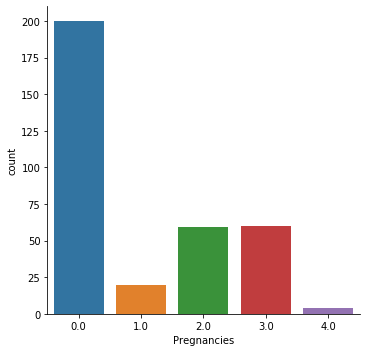

In [12]:
sns.catplot(x='Pregnancies', kind='count', data=df[df['Gender'] == 'Female'])
missing_rows = pd.isna(df['Pregnancies'])
df[missing_rows].iloc[:, 0:17]

In [13]:
cols = ['Ag_v', 'Ge_v', 'FD_v', 'PA_v', 'BMI', 'Sm_v', 'Al_v', 'Sleep', 'SoundSleep', 'RM_v', 'JF_v', 'St_v', 'BP_v', 'Pregnancies', 'GD_v', 'UF_v', 'Di_v']
df_v = df.loc[:, cols]
df_v

,Ag_v,Ge_v,FD_v,PA_v,BMI,Sm_v,Al_v,Sleep,SoundSleep,RM_v,JF_v,St_v,BP_v,Pregnancies,GD_v,UF_v,Di_v
0,2,0,0,1.00,39.0,0,0,8,6,0,0.10,0.33,1.0,0.0,0,0,0
1,2,0,0,0.33,28.0,0,0,8,6,1,0.35,0.33,0.5,0.0,0,0,0
2,1,0,0,1.00,24.0,0,0,6,6,0,0.10,0.33,0.5,0.0,0,0,0
3,2,0,0,1.00,23.0,0,0,8,6,0,0.10,0.33,0.5,0.0,0,0,0
4,1,0,0,0.33,27.0,0,0,8,8,0,0.10,0.33,0.5,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0,0,1,0.66,25.0,0,0,8,6,0,0.65,0.33,0.5,0.0,0,0,1
948,3,0,1,0.66,27.0,0,0,6,5,1,0.10,0.33,1.0,0.0,0,1,1
949,3,0,0,0.00,23.0,0,0,6,5,1,0.10,0.33,1.0,0.0,0,0,0
950,3,0,0,0.33,27.0,0,1,6,5,1,0.10,0.66,1.0,0.0,0,0,0


In [14]:
target_df = df_v[missing_rows & df_v['Ge_v'] == 1]
train_test_df = df_v[~missing_rows & df_v['Ge_v'] == 1]
train_test_df

,Ag_v,Ge_v,FD_v,PA_v,BMI,Sm_v,Al_v,Sleep,SoundSleep,RM_v,JF_v,St_v,BP_v,Pregnancies,GD_v,UF_v,Di_v
12,0,1,0,0.33,21.0,0,0,6,6,0,0.10,0.33,0.5,1.0,0,0,0
13,0,1,0,1.00,22.0,0,0,8,7,0,0.10,0.66,0.5,2.0,0,0,0
15,1,1,1,0.00,34.0,0,0,6,6,0,0.10,0.33,0.5,3.0,0,0,0
17,0,1,0,0.66,24.0,0,0,6,6,0,0.10,0.33,0.5,2.0,0,1,0
21,0,1,1,1.00,24.0,0,0,4,4,1,0.65,1.00,0.5,3.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2,1,1,0.33,35.0,0,0,8,5,1,0.65,0.66,0.5,2.0,0,1,1
937,1,1,1,0.66,33.0,0,0,7,2,1,0.10,0.33,1.0,0.0,0,1,1
938,1,1,1,1.00,34.0,0,0,6,2,1,0.90,0.66,0.5,0.0,0,1,1
944,2,1,0,1.00,22.0,0,0,8,5,1,0.10,1.00,0.5,3.0,0,0,1


In [15]:
x = train_test_df.drop(['Ge_v', 'Pregnancies'], axis=1)
y = train_test_df['Pregnancies']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9186046511627907

In [17]:
target_x = target_df.drop(['Ge_v', 'Pregnancies'], axis=1)

In [18]:
for i, x in zip(list(target_df.index.values), knn.predict(target_x)):
    df_v.loc[i, 'Pregnancies'] = x
df_v

,Ag_v,Ge_v,FD_v,PA_v,BMI,Sm_v,Al_v,Sleep,SoundSleep,RM_v,JF_v,St_v,BP_v,Pregnancies,GD_v,UF_v,Di_v
0,2,0,0,1.00,39.0,0,0,8,6,0,0.10,0.33,1.0,0.0,0,0,0
1,2,0,0,0.33,28.0,0,0,8,6,1,0.35,0.33,0.5,0.0,0,0,0
2,1,0,0,1.00,24.0,0,0,6,6,0,0.10,0.33,0.5,0.0,0,0,0
3,2,0,0,1.00,23.0,0,0,8,6,0,0.10,0.33,0.5,0.0,0,0,0
4,1,0,0,0.33,27.0,0,0,8,8,0,0.10,0.33,0.5,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0,0,1,0.66,25.0,0,0,8,6,0,0.65,0.33,0.5,0.0,0,0,1
948,3,0,1,0.66,27.0,0,0,6,5,1,0.10,0.33,1.0,0.0,0,1,1
949,3,0,0,0.00,23.0,0,0,6,5,1,0.10,0.33,1.0,0.0,0,0,0
950,3,0,0,0.33,27.0,0,1,6,5,1,0.10,0.66,1.0,0.0,0,0,0


In [19]:
df_v['Sleep'].unique()

array([ 8,  6, 10,  7, 11,  9,  4,  5], dtype=int64)

In [20]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 951
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ag_v         948 non-null    int64  
 1   Ge_v         948 non-null    int64  
 2   FD_v         948 non-null    int64  
 3   PA_v         948 non-null    float64
 4   BMI          948 non-null    float64
 5   Sm_v         948 non-null    int64  
 6   Al_v         948 non-null    int64  
 7   Sleep        948 non-null    int64  
 8   SoundSleep   948 non-null    int64  
 9   RM_v         948 non-null    int64  
 10  JF_v         948 non-null    float64
 11  St_v         948 non-null    float64
 12  BP_v         948 non-null    float64
 13  Pregnancies  948 non-null    float64
 14  GD_v         948 non-null    int64  
 15  UF_v         948 non-null    int64  
 16  Di_v         948 non-null    int64  
dtypes: float64(6), int64(11)
memory usage: 173.3 KB


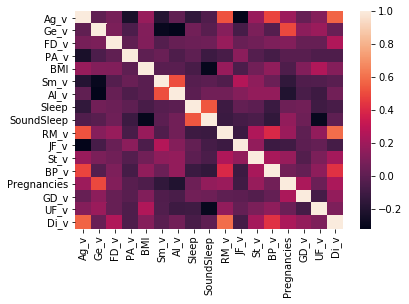

In [21]:
sns.heatmap(df_v.corr())

In [22]:
x = df_v.drop('Di_v', axis=1)
y = df_v['Di_v']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9421052631578948

In [30]:
log = LogisticRegression(max_iter=400)
log.fit(x_train, y_train)
log.score(x_test, y_test)

0.8421052631578947

In [25]:
lin = LinearRegression()
lin.fit(x_train, y_train)
lin.score(x_test, y_test)

0.502597020723168

In [26]:
for col, val in zip(x.columns, lin.coef_):
    print(col + ' : ' + str(val))

Ag_v : 0.12742089886125388
Ge_v : -0.06827087990645991
FD_v : 0.13253485100226123
PA_v : 0.08992598763085799
BMI : -0.0016456181094022457
Sm_v : 0.08504342586444051
Al_v : -0.0335140040861022
Sleep : -0.010256533138546828
SoundSleep : 0.01750019018282799
RM_v : 0.3384259709982917
JF_v : 0.09373288528876167
St_v : 0.02479192673484604
BP_v : 0.22718397200190385
Pregnancies : 0.05353323250809247
GD_v : 0.5472700764828622
UF_v : 0.025697916751690905


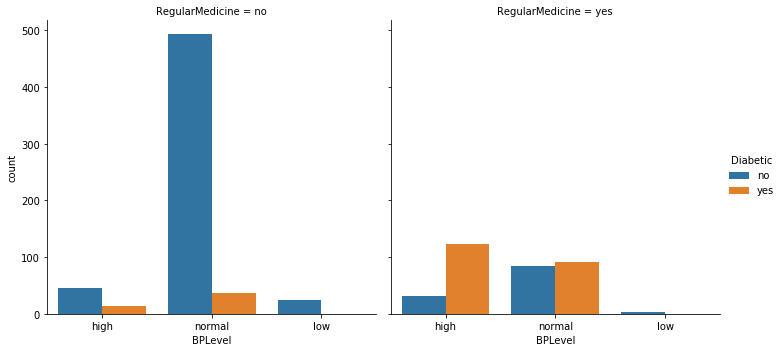

In [27]:
sns.catplot(x='BPLevel', hue='Diabetic', col="RegularMedicine", data=df, kind='count')

In [29]:
path = 'lib/model/Classifier.pkl'

with open(path, 'wb') as f:
    pickle.dump(knn, f)
    print("Pickled classifier at {}".format(path))

Pickled vectorizer at lib/model/Classifier.pkl
